# This is an evaluation file, where we get the metrics

In [1]:
%pip install scikit-image

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

import os
import cv2
import numpy as np


# ===============================
# 1. IMAGE LOADER
# ===============================

def load_rgb(path):
    """Loads image as RGB float32 in [0,1]."""
    img = cv2.imread(path)
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    return img


# ===============================
# 2. METRICS (NumPy versions)
# ===============================

import numpy as np

# -------- METRIC FUNCTIONS --------
def compute_mae(imgA, imgB):
    return np.mean(np.abs(imgA - imgB))

def compute_mse(imgA, imgB):
    return np.mean((imgA - imgB) ** 2)

def compute_psnr(imgA, imgB):
    mse = compute_mse(imgA, imgB)
    if mse == 0:
        return 999.0
    return 20 * np.log10(1.0 / np.sqrt(mse))   # images in [0,1]

def compute_ssim(imgA, imgB, C1=0.01**2, C2=0.03**2):
    imgA = imgA.astype(np.float64)
    imgB = imgB.astype(np.float64)

    muA = imgA.mean()
    muB = imgB.mean()
    sigmaA = imgA.var()
    sigmaB = imgB.var()
    sigmaAB = ((imgA - muA) * (imgB - muB)).mean()

    numerator = (2*muA*muB + C1) * (2*sigmaAB + C2)
    denominator = (muA**2 + muB**2 + C1) * (sigmaA + sigmaB + C2)

    return numerator / denominator


Note: you may need to restart the kernel to use updated packages.


In [2]:
def evaluate_style(style_name, true_dir, pred_dir):
    print(f"\n=== Evaluating style: {style_name} ===")

    mae_list, mse_list, psnr_list, ssim_list = [], [], [], []

    files = sorted([
        f for f in os.listdir(true_dir)
        if f.lower().endswith((".png", ".jpg", ".jpeg"))
    ])

    for fname in files:
        true_path = os.path.join(true_dir, fname)
        pred_path = os.path.join(pred_dir, fname)

        if not os.path.exists(pred_path):
            print(f"Missing prediction: {pred_path}")
            continue

        true_img = load_rgb(true_path)
        pred_img = load_rgb(pred_path)

        if true_img is None or pred_img is None:
            print("Skipping unreadable:", fname)
            continue

        mae_list.append(compute_mae(true_img, pred_img))
        mse_list.append(compute_mse(true_img, pred_img))
        psnr_list.append(compute_psnr(true_img, pred_img))
        ssim_list.append(compute_ssim(true_img, pred_img))

    if len(mae_list) == 0:
        print("NO VALID PAIRS → returning NaN")
        return {
            "style": style_name,
            "MAE": np.nan,
            "MSE": np.nan,
            "PSNR": np.nan,
            "SSIM": np.nan
        }

    results = {
        "style": style_name,
        "MAE": np.mean(mae_list),
        "MSE": np.mean(mse_list),
        "PSNR": np.mean(psnr_list),
        "SSIM": np.mean(ssim_list),
    }

    print("MAE :", results["MAE"])
    print("MSE :", results["MSE"])
    print("PSNR:", results["PSNR"])
    print("SSIM:", results["SSIM"])

    return results

In [6]:
def plot_metrics_per_style(style_name, results_dict):
    """
    Creates a separate linear plot for each style:
    MAE, MSE, PSNR, SSIM on the same chart.
    """
    metrics = ["MAE", "MSE", "PSNR", "SSIM"]
    values  = [results_dict[m] for m in metrics]

    plt.figure(figsize=(7,5))
    x = np.arange(len(metrics))

    plt.plot(x, values, marker="o", color="pink", linewidth=2, label=f"{style_name}")

    # annotate values near points
    for i, v in enumerate(values):
        if not np.isnan(v):
            plt.text(i, v, f"{v:.3f}", fontsize=9, ha='center', va='bottom')

    plt.xticks(x, metrics)
    plt.ylabel("Value")
    plt.title(f"Metrics for Style: {style_name}")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()


=== Evaluating style: blur ===
MAE : 0.039471902
MSE : 0.004085159
PSNR: 27.973104
SSIM: 0.9592107103629579


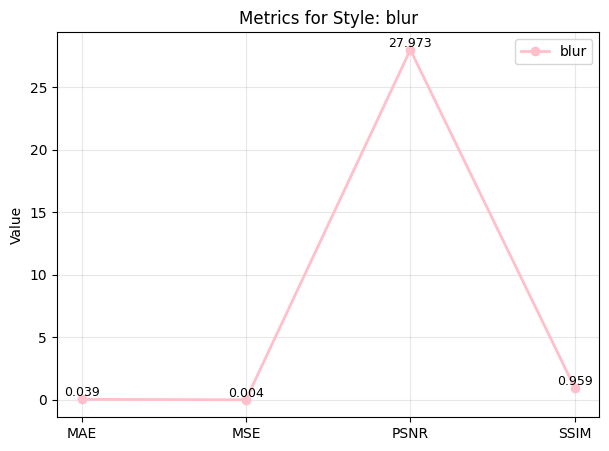


=== Evaluating style: poster ===
MAE : 0.07388949
MSE : 0.020888189
PSNR: 17.512714
SSIM: 0.8185720178018377


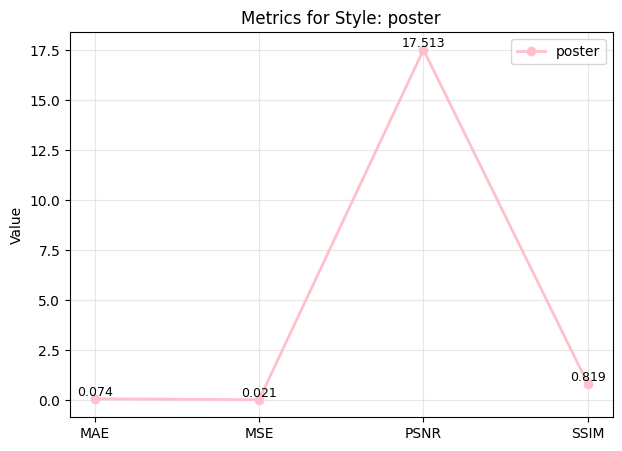


=== Evaluating style: outline ===
MAE : 0.12109402
MSE : 0.031964995
PSNR: 15.118162
SSIM: 0.7342686536797577


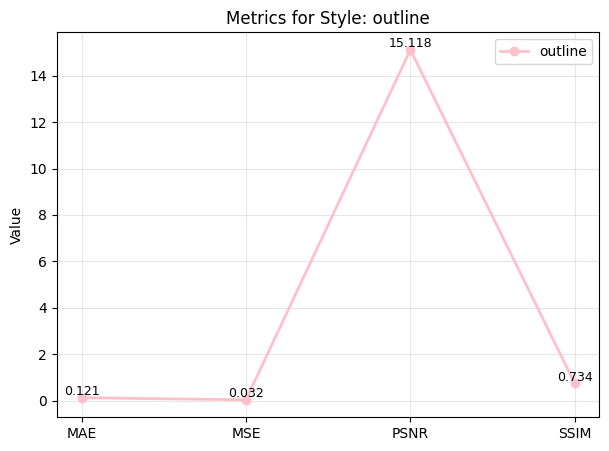


=== Evaluating style: night_vis ===
Missing prediction: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/validate/basic/night_vis/clon_night_vis.png
Missing prediction: /Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/validate/basic/night_vis/lady_night_vis.png
MAE : 0.030373154
MSE : 0.004651763
PSNR: 23.62486
SSIM: 0.9640365051609598


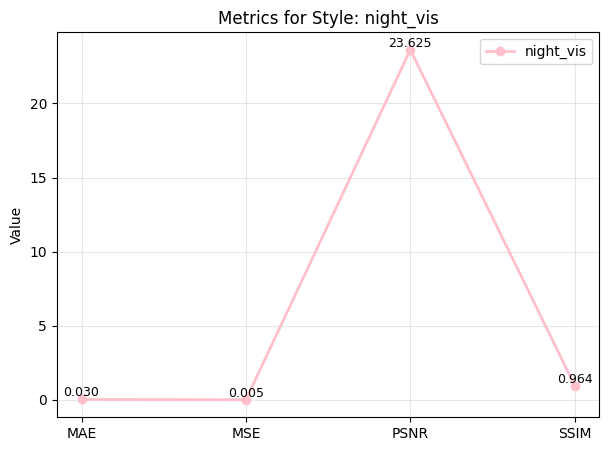

In [7]:
styles = ["blur", "poster", "outline", "night_vis"]

results = []

for style in styles:
    true_dir = f"/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/validate/style/{style}"
    pred_dir = f"/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/validate/basic/{style}"

    res = evaluate_style(style, true_dir, pred_dir)
    results.append(res)
    
    # plot separate chart
    plot_metrics_per_style(style, res)


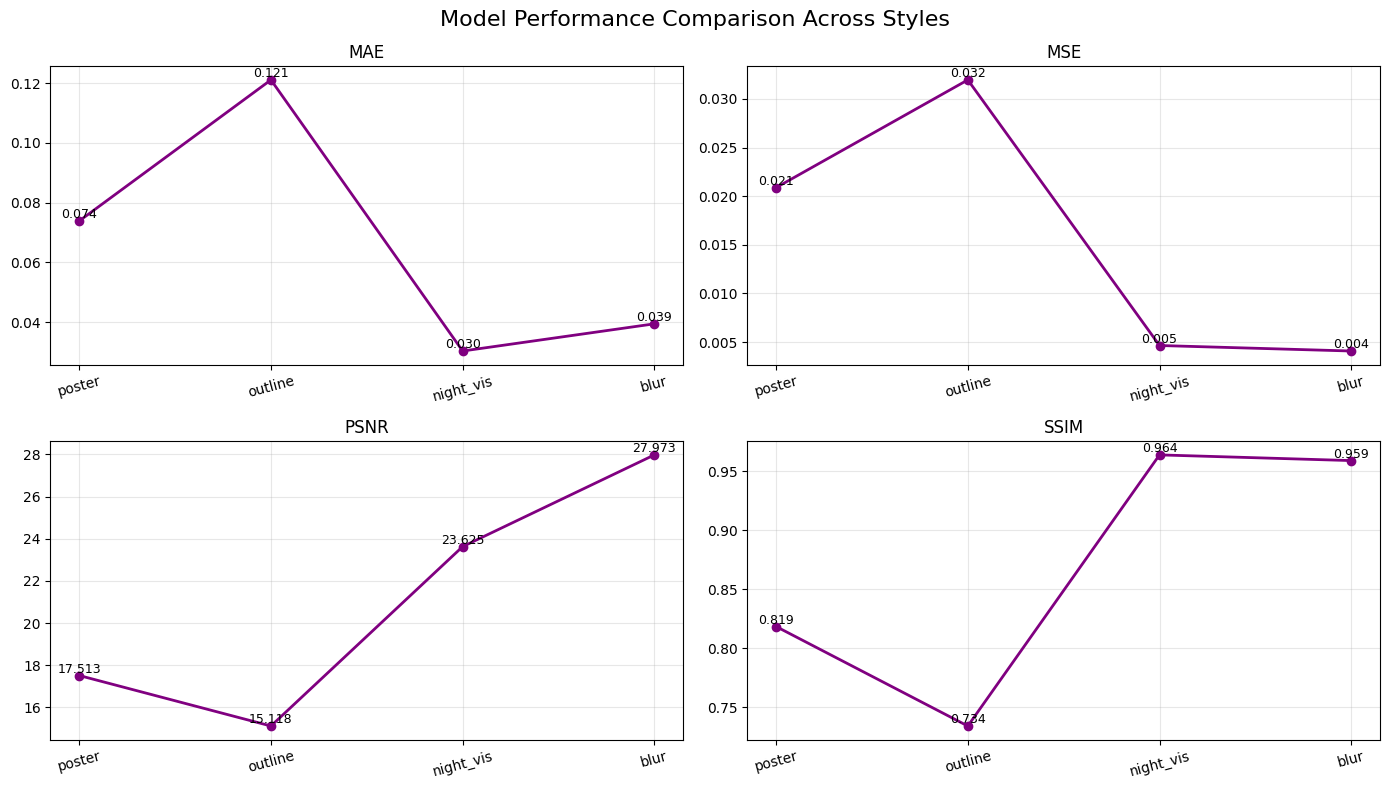

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# METRIC VALUES (your results)
# ============================

styles = ["poster", "outline", "night_vis", "blur"]

metrics = ["MAE", "MSE", "PSNR", "SSIM"]

# Values in same order as 'styles'
MAE_vals  = [0.07388949, 0.12109402, 0.030373154, 0.039471902]
MSE_vals  = [0.020888189, 0.031964995, 0.004651763, 0.004085159]
PSNR_vals = [17.512714, 15.118162, 23.62486, 27.973104]
SSIM_vals = [0.8185720178, 0.7342686536, 0.9640365051, 0.9592107103]

metric_data = [MAE_vals, MSE_vals, PSNR_vals, SSIM_vals]

# ============================
# PLOTTING CONFIG
# ============================

plt.figure(figsize=(14, 8))

for i, (metric_name, values) in enumerate(zip(metrics, metric_data)):
    plt.subplot(2, 2, i+1)
    
    x = np.arange(len(styles))
    
    plt.plot(x, values, marker="o", linewidth=2, color="purple")
    
    for xi, yi in zip(x, values):
        plt.text(xi, yi, f"{yi:.3f}", fontsize=9, ha="center", va="bottom")
    
    plt.xticks(x, styles, rotation=15)
    plt.title(metric_name)
    plt.grid(alpha=0.3)

plt.suptitle("Model Performance Comparison Across Styles", fontsize=16)
plt.tight_layout()
plt.show()


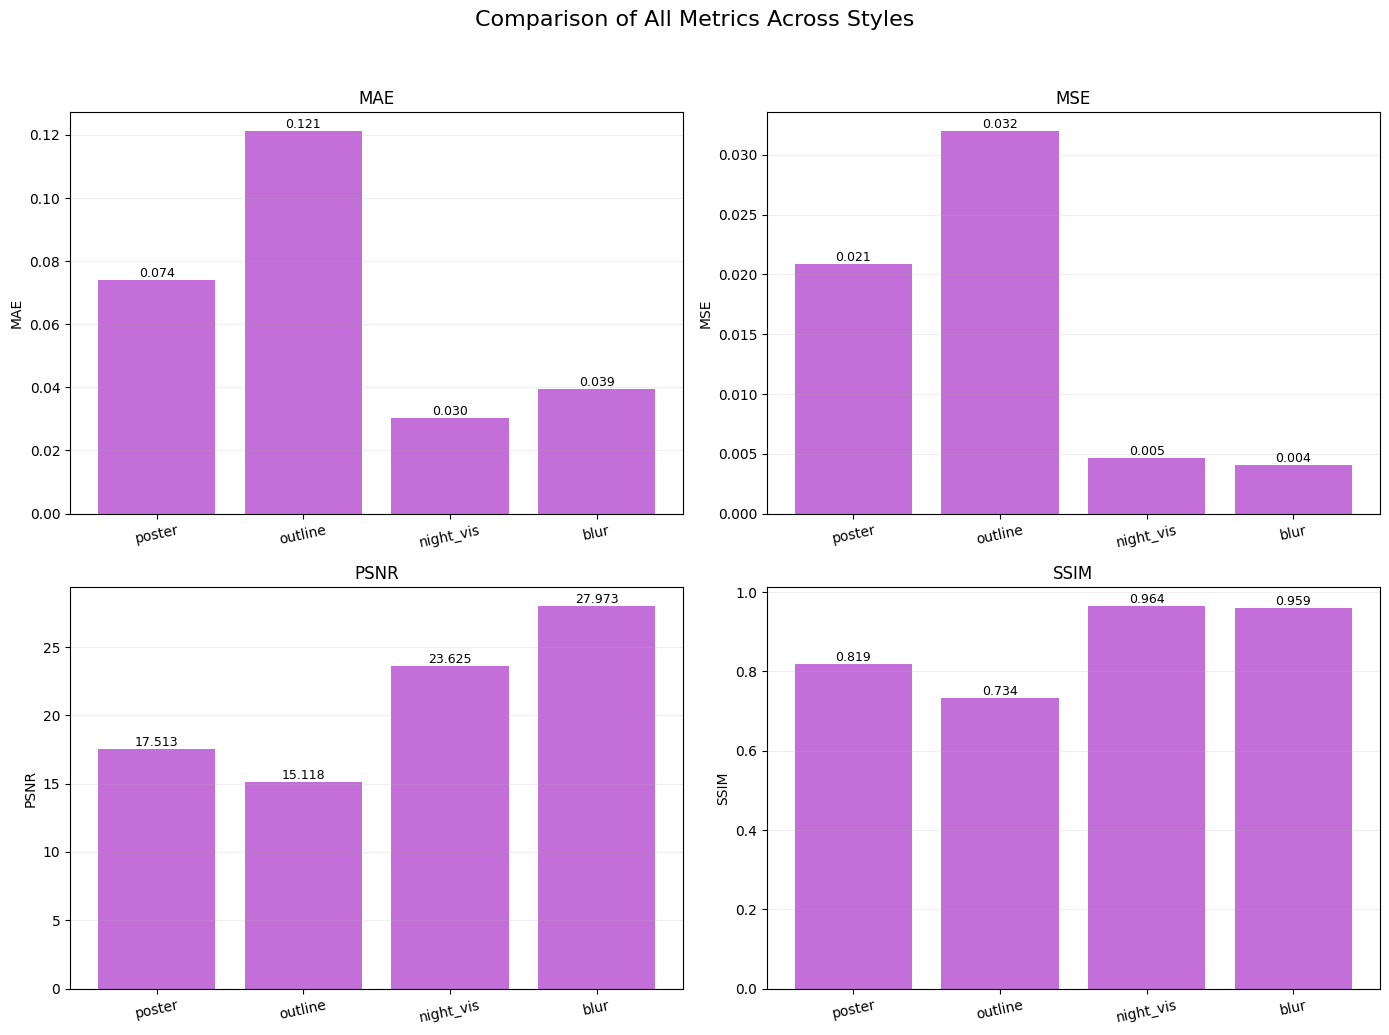

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# METRIC VALUES (your results)
# ============================

styles = ["poster", "outline", "night_vis", "blur"]

metrics = ["MAE", "MSE", "PSNR", "SSIM"]

MAE_vals  = [0.07388949, 0.12109402, 0.030373154, 0.039471902]
MSE_vals  = [0.020888189, 0.031964995, 0.004651763, 0.004085159]
PSNR_vals = [17.512714, 15.118162, 23.62486, 27.973104]
SSIM_vals = [0.8185720178, 0.7342686536, 0.9640365051, 0.9592107103]

metric_data = [MAE_vals, MSE_vals, PSNR_vals, SSIM_vals]

# ============================
# PLOTTING
# ============================

plt.figure(figsize=(14, 10))

for i, (metric_name, values) in enumerate(zip(metrics, metric_data)):
    plt.subplot(2, 2, i + 1)
    
    x = np.arange(len(styles))
    
    # rectangular bars
    bars = plt.bar(x, values, color="mediumorchid", alpha=0.85)
    
    # annotate each bar
    for bar, val in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            val,
            f"{val:.3f}",
            ha="center",
            va="bottom",
            fontsize=9
        )
    
    plt.xticks(x, styles, rotation=12)
    plt.ylabel(metric_name)
    plt.title(metric_name)
    plt.grid(axis="y", alpha=0.2)

plt.suptitle("Comparison of All Metrics Across Styles", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()
